In [2]:
import pandas as pd
import util.analysis_utils as nls

%load_ext autoreload
%autoreload 2

# Baseline Dataset - 330
## Train Validation Set No Control

Train: 3301
Validation: 493
Total: 3794
Mean age for White: 56.14
STD age for White: 7.95
Mean age for Asian: 52.67
STD age for Asian: 9.11
Mean age for Black: 49.77
STD age for Black: 7.76


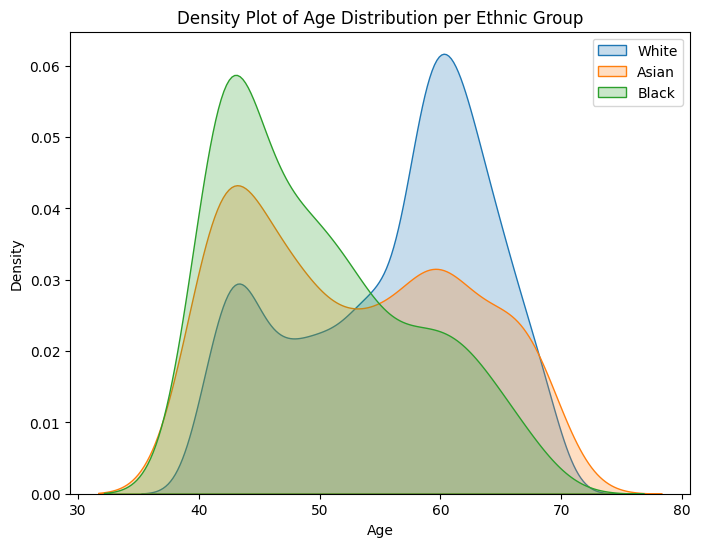

Coding 1 means White and has 3178 patients, male 1504, female 1674
Coding 3 means Asian and has 385 patients, male 258, female 127
Coding 4 means Black and has 231 patients, male 98, female 133


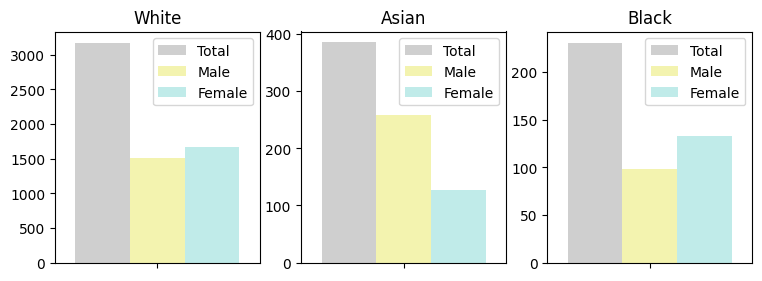

In [6]:
train_df = pd.read_csv('ukbb/train.csv')
print(f'Train: {len(train_df)}')

val_df = pd.read_csv('ukbb/val.csv')
print(f'Validation: {len(val_df)}')

train_val_df = pd.concat([train_df, val_df])
print(f'Total: {len(train_val_df)}')

nls.plot_age_dist(train_val_df)
nls.plot_sex_dist(train_val_df)

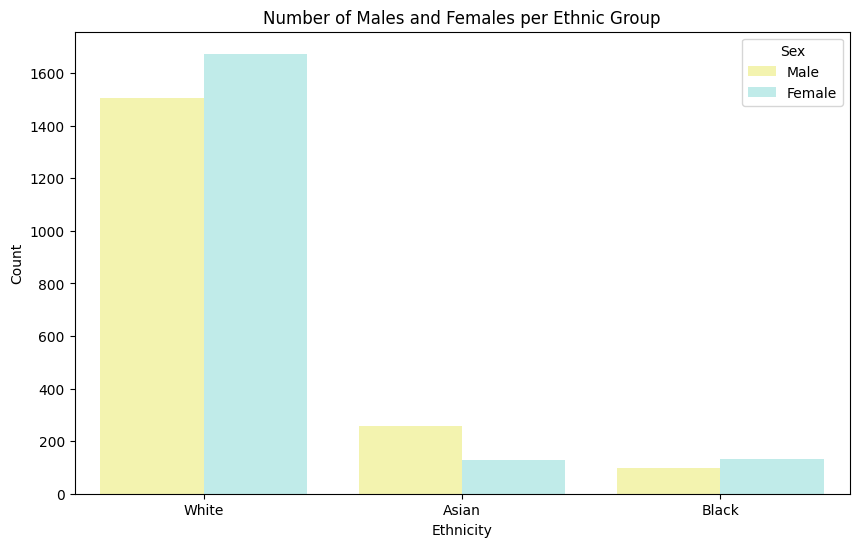

In [14]:
nls.plot_sex_count(train_val_df)

# Balanced Train Datasets

## Age Sex Controlled Train Set - 80

Mean age for White: 51.47
STD age for White: 3.76
Mean age for Asian: 50.16
STD age for Asian: 3.72
Mean age for Black: 50.21
STD age for Black: 3.42


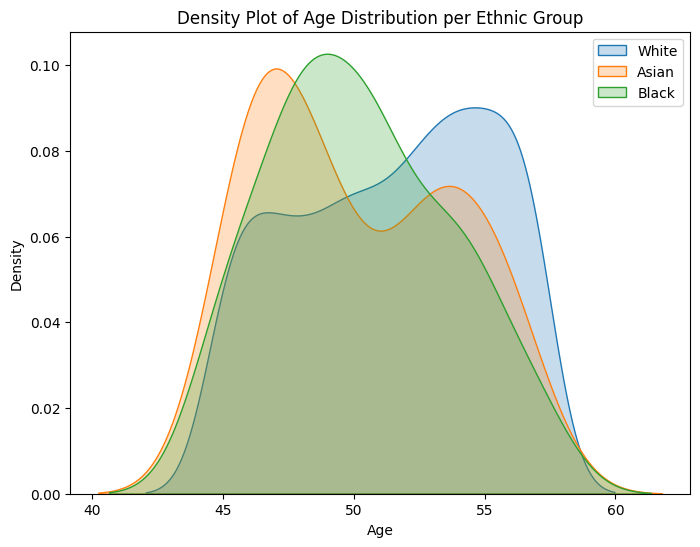

Coding 1 means White and has 796 patients, male 398, female 398
Coding 3 means Asian and has 70 patients, male 35, female 35
Coding 4 means Black and has 72 patients, male 36, female 36


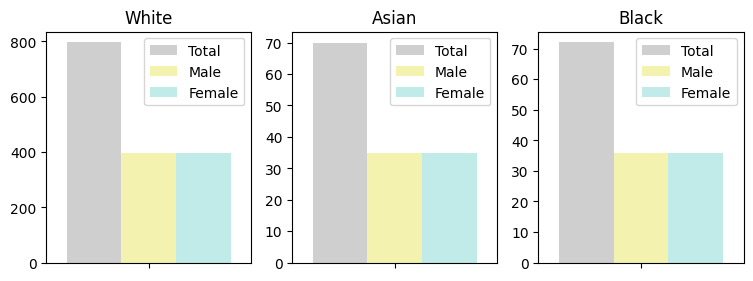

In [15]:
train_val_sex_ctrl_df = pd.read_csv('ukbb/train_val_sex_ctrl.csv')
nls.plot_age_dist(train_val_sex_ctrl_df)
nls.plot_sex_dist(train_val_sex_ctrl_df)
nls.plot_sex_count(train_val_sex_ctrl_df)

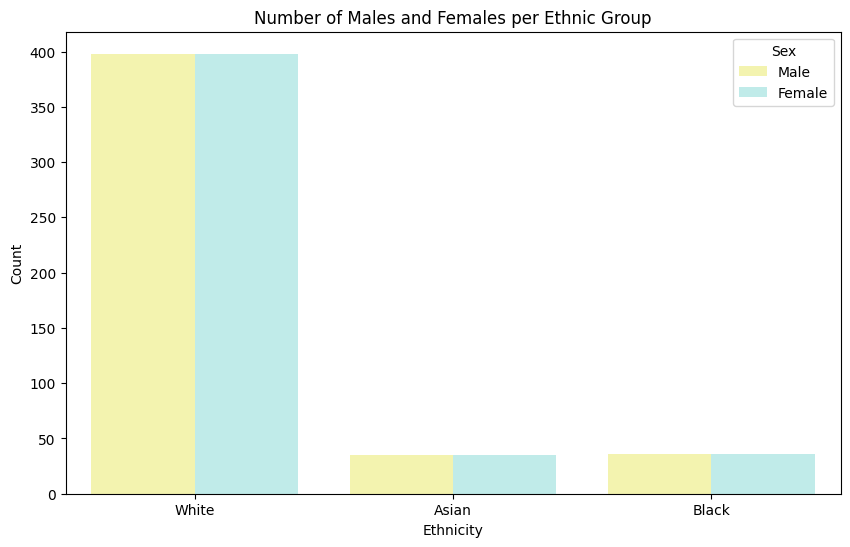

## Age Ethnicity Controlled Train Set - 26

Mean age for White: 51.76
STD age for White: 3.64
Mean age for Asian: 50.92
STD age for Asian: 3.57
Mean age for Black: 50.28
STD age for Black: 3.55


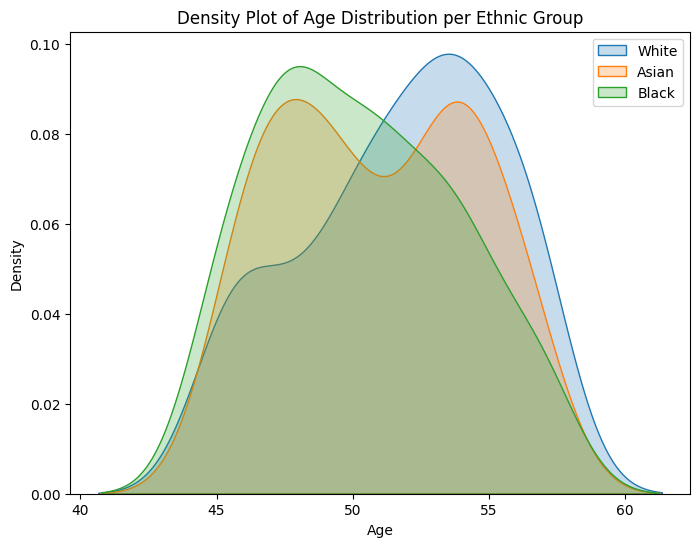

Coding 1 means White and has 101 patients, male 34, female 67
Coding 3 means Asian and has 101 patients, male 73, female 28
Coding 4 means Black and has 101 patients, male 36, female 65


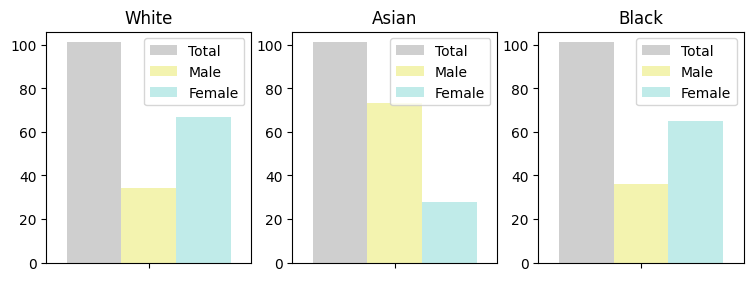

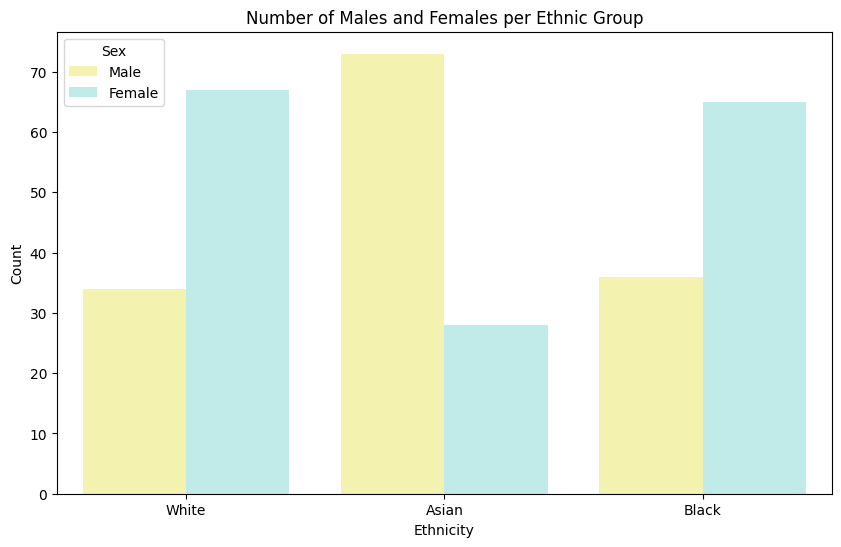

In [18]:
train_val_ethn_ctrl_df = pd.read_csv('ukbb/train_val_ethn_ctrl.csv')
nls.plot_age_dist(train_val_ethn_ctrl_df)
nls.plot_sex_dist(train_val_ethn_ctrl_df)
nls.plot_sex_count(train_val_ethn_ctrl_df)

## Age Sex Ethnicity Controlled Train Set - 18

Mean age for White: 51.77
STD age for White: 3.82
Mean age for Asian: 50.16
STD age for Asian: 3.72
Mean age for Black: 50.23
STD age for Black: 3.46


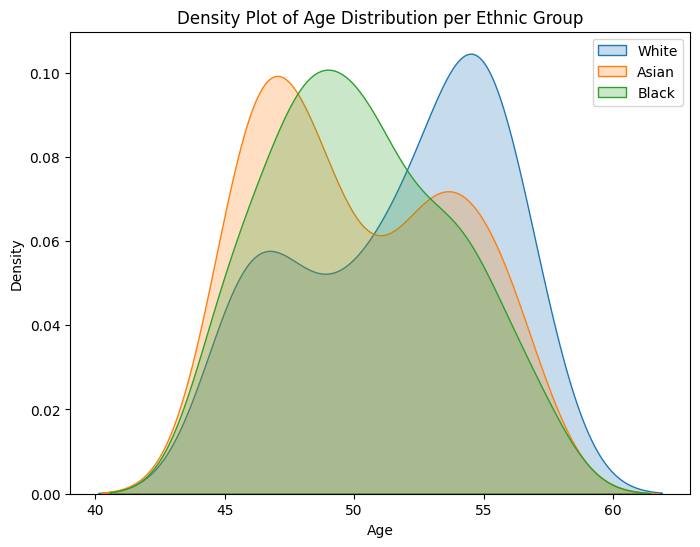

Coding 1 means White and has 70 patients, male 35, female 35
Coding 3 means Asian and has 70 patients, male 35, female 35
Coding 4 means Black and has 70 patients, male 35, female 35


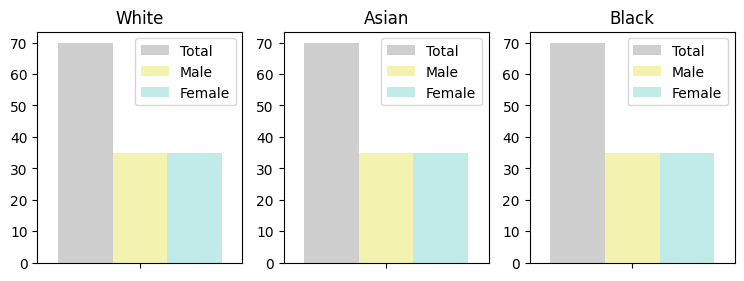

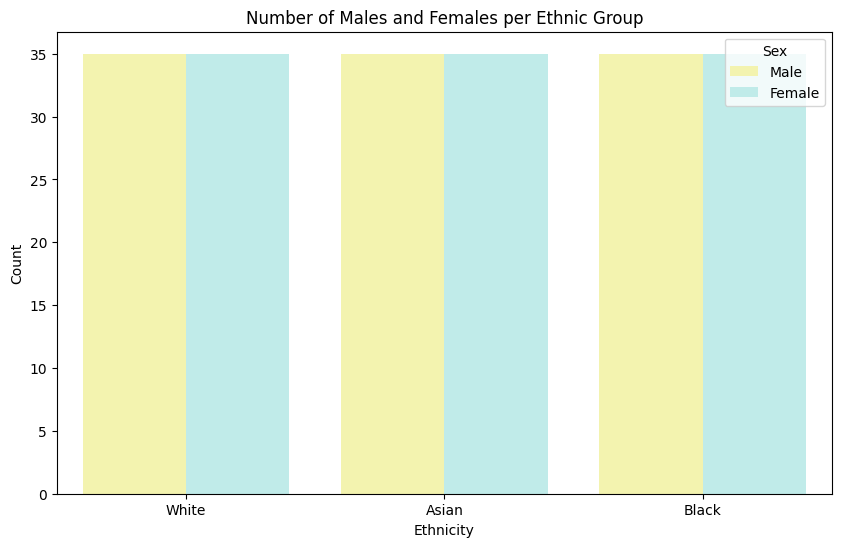

In [19]:
train_val_ethn_ctrl_df = pd.read_csv('ukbb/train_val_sex_ethn_ctrl.csv')
nls.plot_age_dist(train_val_ethn_ctrl_df)
nls.plot_sex_dist(train_val_ethn_ctrl_df)
nls.plot_sex_count(train_val_ethn_ctrl_df)

## Sex Control Test Set

Mean age for White: 51.40
STD age for White: 3.59
Mean age for Asian: 50.89
STD age for Asian: 3.73
Mean age for Black: 50.44
STD age for Black: 3.71


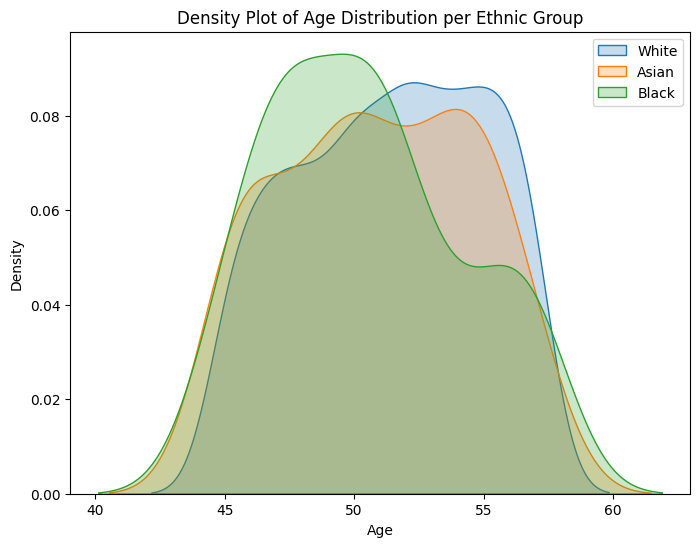

Coding 1 means White and has 800 patients, male 400, female 400
Coding 3 means Asian and has 100 patients, male 50, female 50
Coding 4 means Black and has 62 patients, male 31, female 31


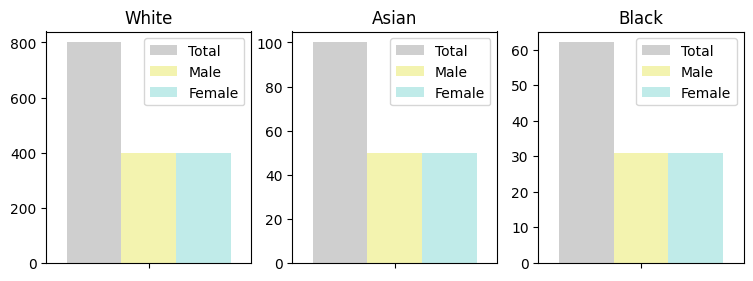

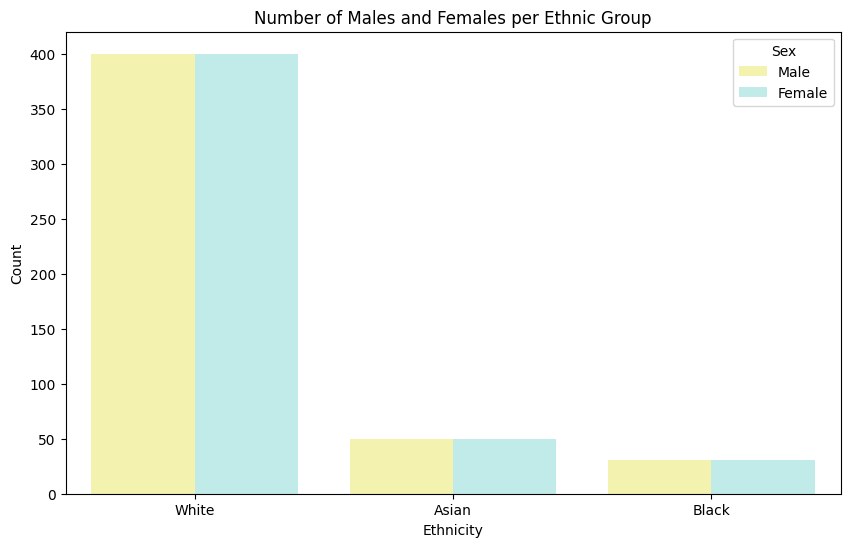

In [20]:
test_sex_ctrl_df = pd.read_csv('ukbb/test_sex_ctrl.csv')
nls.plot_age_dist(test_sex_ctrl_df)
nls.plot_sex_dist(test_sex_ctrl_df)
nls.plot_sex_count(test_sex_ctrl_df)

## Ethnicity Control Test Set

Mean age for White: 50.42
STD age for White: 3.75
Mean age for Asian: 50.61
STD age for Asian: 3.67
Mean age for Black: 50.89
STD age for Black: 3.42


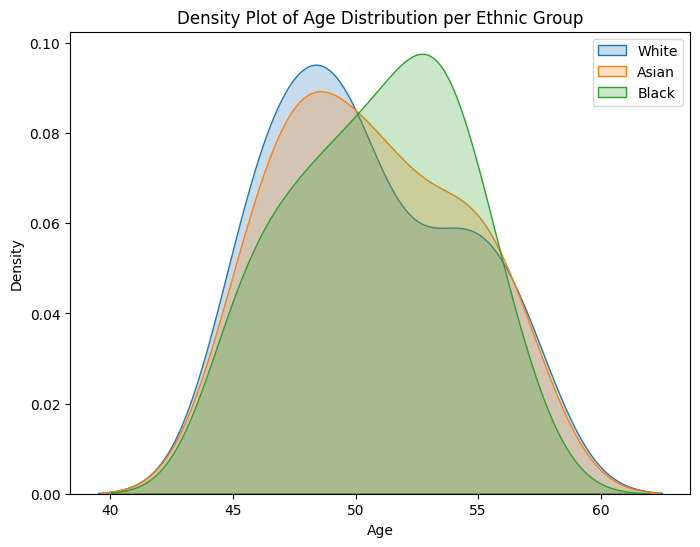

Coding 1 means White and has 36 patients, male 16, female 20
Coding 3 means Asian and has 36 patients, male 19, female 17
Coding 4 means Black and has 36 patients, male 17, female 19


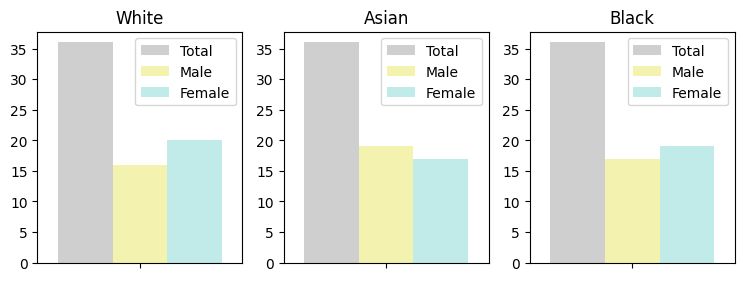

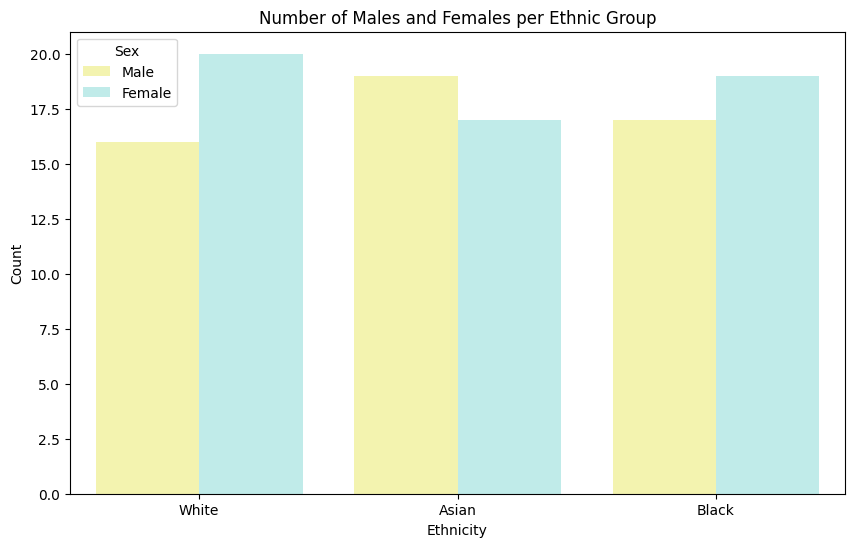

In [21]:
test_ethn_ctrl_df = pd.read_csv('ukbb/test_ethn_ctrl.csv')
nls.plot_age_dist(test_ethn_ctrl_df)
nls.plot_sex_dist(test_ethn_ctrl_df)
nls.plot_sex_count(test_ethn_ctrl_df)

In [12]:
test_sex_ctrl_df = pd.read_csv('ukbb/test_sex_ctrl.csv')
print('sex test set:', len(test_sex_ctrl_df))

test_ethn_ctrl_df = pd.read_csv('ukbb/test_ethn_ctrl.csv')
print('ethnicity test:', len(test_ethn_ctrl_df))

merged_df = pd.merge(test_sex_ctrl_df, test_ethn_ctrl_df, on='eid', how='outer')
print('total test:', len(merged_df))
print('total train + val: 3794')
print('total dataset: ', 3794 + len(merged_df))

sex test set: 962
ethnicity test: 108
total test: 1025
total train + val: 3794
total dataset:  4819


In [19]:
for exp in range(1, 5):
    print('Experiment', exp)
    print('----')
    train = pd.read_csv(f'ukbb/exp{exp}/seed42/train.csv')
    print('train:', len(train))
    val = pd.read_csv(f'ukbb/exp{exp}/seed42/val.csv')
    print('val:', len(val))
    print('train + val:', len(train) + len(val))
    print()

Experiment 1
----
train: 3301
val: 493
train + val: 3794

Experiment 2
----
train: 805
val: 122
train + val: 927

Experiment 3
----
train: 264
val: 39
train + val: 303

Experiment 4
----
train: 182
val: 27
train + val: 209



In [20]:
for exp in [330, 80, 26, 18]:
    print('Experiment', exp)
    print('----')
    train = pd.read_csv(f'splits/ukbb/{exp}/seed42/train.csv')
    print('train:', len(train))
    val = pd.read_csv(f'splits/ukbb/{exp}/seed42/val.csv')
    print('val:', len(val))
    print('train + val:', len(train) + len(val))

    labeled = pd.read_csv(f'splits/ukbb/{exp}/seed42/labeled.csv')
    print('labeled slices:', len(labeled))
    unlabeled = pd.read_csv(f'splits/ukbb/{exp}/seed42/unlabeled.csv')
    print('unlabeled slices:', len(unlabeled))
    print('total slices:', len(labeled) + len(unlabeled))
    print()

Experiment 330
----
train: 70728
val: 986
train + val: 71714
labeled slices: 7073
unlabeled slices: 63655
total slices: 70728

Experiment 80
----
train: 17484
val: 244
train + val: 17728
labeled slices: 1748
unlabeled slices: 15736
total slices: 17484

Experiment 26
----
train: 5694
val: 78
train + val: 5772
labeled slices: 569
unlabeled slices: 5125
total slices: 5694

Experiment 18
----
train: 3896
val: 54
train + val: 3950
labeled slices: 390
unlabeled slices: 3506
total slices: 3896

